In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Simple CNN Implemented using Keras.

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

# Define a simple CNN model with an explicit Input layer
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for MNIST digits
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Print results
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9084 - loss: 0.2913 - val_accuracy: 0.9842 - val_loss: 0.0488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9862 - loss: 0.0421 - val_accuracy: 0.9911 - val_loss: 0.0281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9895 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9935 - loss: 0.0186 - val_accuracy: 0.9899 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9954 - loss: 0.0132 - val_accuracy: 0.9916 - val_loss: 0.0290
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9885 - loss: 0.0384
Test accuracy: 0.9916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# **Exercise.**

Task 1: Data Understanding and Visualization:

• Get the list of class directories from the train folder.

• Select one image randomly from each class

• Display the images in a grid format with two rows using matplotlib.

In [20]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

train_path = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/train'
test_path = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/test'

In [21]:
class_dirs = [d for d in os.listdir(train_path)
              if os.path.isdir(os.path.join(train_path, d))]
class_dirs.sort()  # Sort alphabetically for consistent ordering

print("Found classes:", class_dirs)

Found classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [22]:
num_classes = len(class_dirs)
cols = (num_classes + 1) // 2

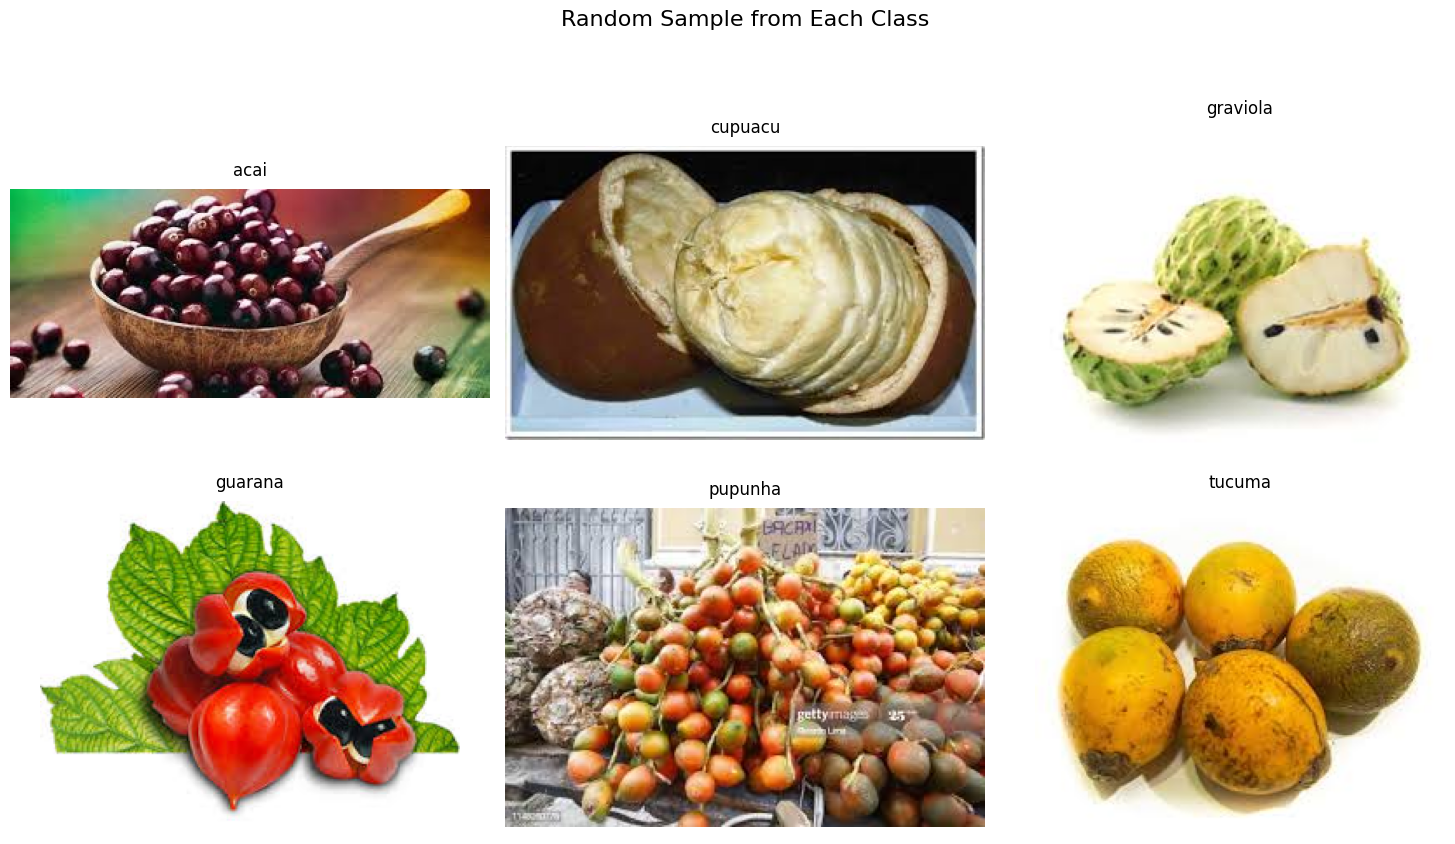

In [23]:
plt.figure(figsize=(15, 8))
plt.suptitle("Random Sample from Each Class", fontsize=16, y=1.05)

for i, class_name in enumerate(class_dirs):
    # Get all images in the class directory
    class_path = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(class_path)
             if os.path.isfile(os.path.join(class_path, f))]

    # Select a random image
    if images:  # Only proceed if there are images in the directory
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)

        # Open and display the image
        try:
            img = Image.open(img_path)

            # Create subplot
            plt.subplot(2, cols, i+1)
            plt.imshow(img)
            plt.title(class_name, pad=10)
            plt.axis('off')

        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    else:
        print(f"No images found in class: {class_name}")

plt.tight_layout()
plt.show()

What did you Observe?

Answer: The output lists six Amazonian fruit classes: acal, cupuacu, graviola, guarana, pupunha, and tucuma. The list provides a clear overview of the different fruit types contained in your dataset's training folder.

In [24]:
from PIL import ImageFile


def check_and_remove_corrupted_images(directory):
    corrupted_images = []

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                continue

            try:
                with Image.open(file_path) as img:
                    img.verify()

                with Image.open(file_path) as img:
                    img.load()
            except (IOError, SyntaxError, Image.DecompressionBombError) as e:
                print(f"Removed corrupted image: {file_path} - Error: {str(e)}")
                corrupted_images.append(file_path)
                os.remove(file_path)

    return corrupted_images


corrupted = check_and_remove_corrupted_images(train_path)

if not corrupted:
    print("No corrupted images found.")
else:
    print(f"\nTotal corrupted images removed: {len(corrupted)}")

No corrupted images found.


**Task 2: Loading and Preprocessing Image Data in keras:**

In [25]:
import tensorflow as tf

train_dir = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/train'
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2
seed = 123

train_ds_unmapped = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=seed
)

val_ds_unmapped = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=seed
)

class_names = train_ds_unmapped.class_names
print("Class names:", class_names)

normalization = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds_unmapped.map(lambda x, y: (normalization(x), y))
val_ds = val_ds_unmapped.map(lambda x, y: (normalization(x), y))

for images, labels in train_ds.take(1):
    print("\nFirst training batch:")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Pixel value range: ({:.2f}, {:.2f})".format(
        tf.reduce_min(images).numpy(),
        tf.reduce_max(images).numpy()
    ))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

First training batch:
Images shape: (32, 128, 128, 3)
Labels shape: (32,)
Pixel value range: (0.00, 1.00)


**Task 3 - Implement a CNN with**

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=6):
    model = models.Sequential([
        layers.Input(shape=input_shape),  # Explicit Input layer
        layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Ensure img_height, img_width, and class_names are defined before calling
img_height, img_width = 128, 128  # Example values
class_names = ["class1", "class2", "class3", "class4", "class5", "class6"]

model = create_cnn_model(input_shape=(img_height, img_width, 3), num_classes=len(class_names))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

**Task 4:**

Compile the Model

In [27]:
# Compile the model with recommended settings
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

extra_metrics = [
    tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2, name='top2_accuracy'),
    tf.keras.metrics.SparseCategoricalCrossentropy(name='xentropy')
]

# Verify compilation
print("Model successfully compiled!")
print("Optimizer:", model.optimizer.get_config()['name'])
print("Loss function:", model.loss)
print("Metrics:", [m.name for m in model.metrics])

Model successfully compiled!
Optimizer: adam
Loss function: sparse_categorical_crossentropy
Metrics: ['loss', 'compile_metrics']


Train the Model

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.1100 - loss: 1.8583
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 777ms/step - accuracy: 0.1102 - loss: 1.8674 - val_accuracy: 0.0000e+00 - val_loss: 1.7968
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.2049 - loss: 1.7972
Epoch 2: val_accuracy improved from 0.00000 to 0.27778, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 600ms/step - accuracy: 0.2057 - loss: 1.7912 - val_accuracy: 0.2778 - val_loss: 1.6919
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.4664 - loss: 1.5320
Epoch 3: val_accuracy did not improve from 0.27778
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.4575 - loss: 1.5286 - val_accuracy: 0.1111 - val_loss: 1.7885
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.3843 - loss: 1.3496
Epoch 4: val_accuracy did not improve from 0.27778
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/

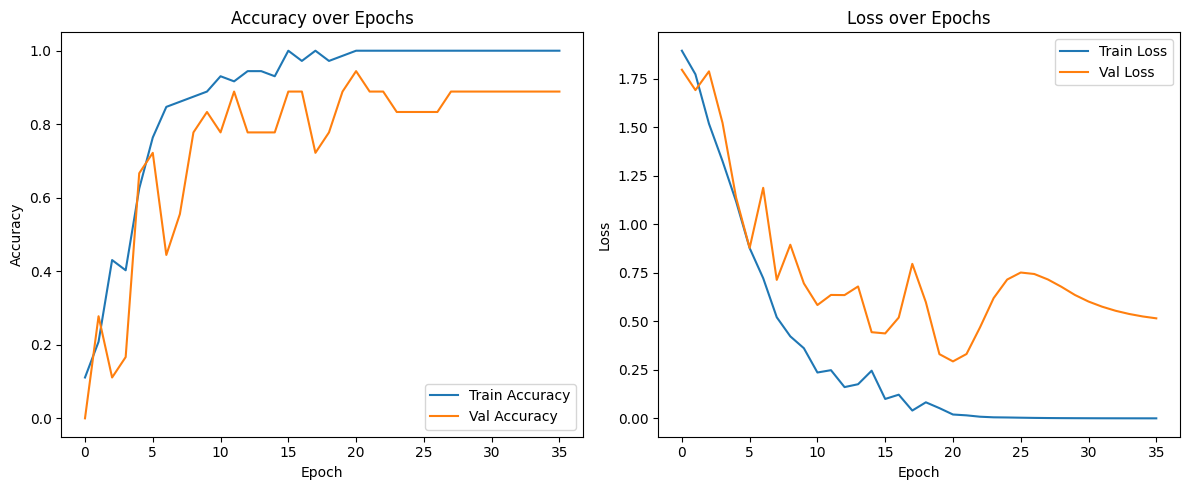

In [28]:
import numpy as np
from sklearn.metrics import classification_report

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Task 5: Evaluate the Model**

In [29]:
# Load test dataset
test_dir = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
).map(lambda x, y: (normalization(x), y))

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.6333 - loss: 0.7824

Test Accuracy: 0.6333
Test Loss: 0.7824


**Task 6: Save and Load the Model**

In [33]:
model.save('fruit_classifier.keras', include_optimizer=False)

# Load the saved model
loaded_model = tf.keras.models.load_model('fruit_classifier.keras')

# Verify loaded model
loaded_loss, loaded_acc = loaded_model.evaluate(test_ds)
print(f'\nLoaded Model Test Accuracy: {loaded_acc:.4f}')
print(f'Loaded Model Test Loss: {loaded_loss:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.6333 - loss: 0.7824

Loaded Model Test Accuracy: 0.6333
Loaded Model Test Loss: 0.7824


**Task 7: Predictions and Classification Report**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step

Classification Report:
              precision    recall  f1-score   support

        acai       0.75      0.60      0.67         5
     cupuacu       0.57      0.80      0.67         5
    graviola       0.67      0.80      0.73         5
     guarana       1.00      0.60      0.75         5
     pupunha       1.00      0.60      0.75         5
      tucuma       0.29      0.40      0.33         5

    accuracy                           0.63        30
   macro avg       0.71      0.63      0.65        30
weighted avg       0.71      0.63      0.65        30



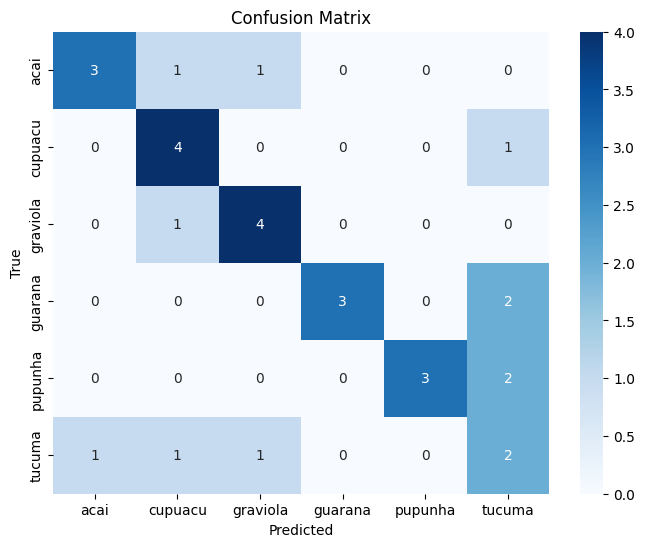

In [34]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(loaded_model.predict(images), axis=1))

# Classification report
print('\nClassification Report:')
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()